In [1]:
# !pip install mysql-connector-python

## Importing Libraries

In [3]:
# Import pandas library for data manipulation
import pandas as pd            

# Import datetime class from datetime module for date handling
from datetime import datetime   

# Import MySQL Connector Python module for MySQL database interaction
import mysql.connector

# Import Error class from MySQL Connector module for error handling
from mysql.connector import Error

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

## Data Load

In [5]:
data = pd.read_csv('10k_borrowers_data.csv')

In [6]:
# Display the first five rows of the DataFrame
data.head()

,Name,Date of Birth,Gender,Marital Status,Phone Number,Email Address,Mailing Address,Language Preference,Geographical Location,Credit Score,...,Loan Amount,Loan Term,Interest Rate,Loan Purpose,EMI,IP Address,Geolocation,Repayment History,Days Left to Pay Current EMI,Delayed Payment
0,Mannat Raja,04-07-1993,Female,Married,7.337991e+08,mdeshpande@example.org,"47/359, Manda Nagar\nPhusro-351513",Hindi,Rourkela,491.0,...,34766.0,15.0,0.28,Medical Emergency,2773.61,10.128.115.114,"-71.6020475, -51.892151","[{'Payment Date': datetime.date(2023, 7, 2), '...",6.0,Yes
1,Kashvi Bera,25-11-2000,Female,Widowed,3.707545e+09,ganeshvivaan@example.org,"06/109\nKothari Marg, Amritsar 359591",English,Dewas,601.0,...,13429.0,13.0,0.18,Wedding Expenses,1144.69,10.171.84.107,"17.074404, -140.913933","[{'Payment Date': datetime.date(2023, 7, 3), '...",1.0,Yes
2,Rasha Bhagat,14-01-1976,Female,Married,6.316296e+08,neysasankaran@example.com,"72/566\nBava Marg, Ajmer-034063",Telugu,Guwahati,540.0,...,54579.0,5.0,0.27,Education Fees,11663.54,192.168.173.109,"-84.417644, -53.833944","[{'Payment Date': datetime.date(2023, 7, 7), '...",6.0,Yes
3,Ritvik Kalla,05-12-2003,Female,Divorced,9.190038e+11,shamikbath@example.org,"85/222\nSheth Road, Secunderabad 193560",Hindi,Jabalpur,478.0,...,79654.0,8.0,0.20,Debt Consolidation,10717.90,10.113.171.243,"-22.5478035, -136.499639","[{'Payment Date': datetime.date(2023, 7, 21), ...",11.0,Yes
4,Tejas De,14-11-1991,Female,Single,9.135364e+11,jivin77@example.com,71/49\nShukla Road\nNoida-018208,Kannada,Guntakal,589.0,...,51566.0,11.0,0.27,Medical Emergency,5344.12,172.30.115.105,"16.2175855, -52.977905","[{'Payment Date': datetime.date(2023, 7, 19), ...",13.0,Yes


In [7]:
# Display the last five rows of the DataFrame
data.tail()

,Name,Date of Birth,Gender,Marital Status,Phone Number,Email Address,Mailing Address,Language Preference,Geographical Location,Credit Score,...,Loan Amount,Loan Term,Interest Rate,Loan Purpose,EMI,IP Address,Geolocation,Repayment History,Days Left to Pay Current EMI,Delayed Payment
5100,Pihu Uppal,22-05-1993,Male,Divorced,6.738529e+09,samaira17@example.com,"19, Dhillon Street\nRanchi-830581",Gujarati,Katihar,702.0,...,64458.0,14.0,0.23,Medical Emergency,5293.18,172.16.196.171,"-50.0698815, -9.882135","[{'Payment Date': datetime.date(2023, 7, 25), ...",8.0,No
5101,Myra Venkatesh,12-09-1970,Male,Widowed,8.882224e+09,wsankaran@example.net,"14\nShah Path, Latur 212670",Hindi,Jamshedpur,482.0,...,39734.0,8.0,0.26,Medical Emergency,5463.11,192.168.187.174,"86.1737005, -37.589629","[{'Payment Date': datetime.date(2023, 7, 19), ...",8.0,No
5102,Shayak Rout,29-03-1963,Female,Married,9.194622e+11,tkrish@example.com,"H.No. 448\nGanguly Ganj, Gaya 501189",Telugu,Udaipur,801.0,...,93530.0,7.0,0.27,Medical Emergency,14590.70,10.53.85.163,"5.5168035, 35.713995","[{'Payment Date': datetime.date(2023, 7, 13), ...",5.0,No
5103,Sana Zachariah,25-06-2002,Male,Widowed,9.173145e+11,elachander@example.net,"H.No. 571, Kanda Zila, Satara-547365",Telugu,Tiruchirappalli,570.0,...,81949.0,15.0,0.15,Debt Consolidation,6025.42,10.116.216.180,"-42.478759, 73.737517","[{'Payment Date': datetime.date(2023, 7, 27), ...",6.0,No
5104,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Understanding

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          5105 non-null   object 
 1   Date of Birth                 5104 non-null   object 
 2   Gender                        5104 non-null   object 
 3   Marital Status                5104 non-null   object 
 4   Phone Number                  5104 non-null   float64
 5   Email Address                 5104 non-null   object 
 6   Mailing Address               5104 non-null   object 
 7   Language Preference           5104 non-null   object 
 8   Geographical Location         5104 non-null   object 
 9   Credit Score                  5104 non-null   float64
 10  Loan Type                     5104 non-null   object 
 11  Loan Amount                   5104 non-null   float64
 12  Loan Term                     5104 non-null   float64
 13  Int

In [10]:
# Generate descriptive statistics summary for numerical columns in DataFrame
data.describe()

,Phone Number,Credit Score,Loan Amount,Loan Term,Interest Rate,EMI,Days Left to Pay Current EMI
count,5.104000e+03,5104.000000,5104.000000,5104.000000,5104.000000,5104.000000,5104.000000
mean,3.047080e+11,573.834052,54891.338166,7.968456,0.200639,12808.815923,8.051920
std,4.277342e+11,157.697706,26035.424945,4.300808,0.057717,16012.391402,4.360343
min,2.881670e+06,300.000000,10002.000000,1.000000,0.100000,775.340000,1.000000
25%,3.670582e+09,439.000000,32328.500000,4.000000,0.150000,4381.915000,4.000000
50%,7.450756e+09,573.000000,54818.500000,8.000000,0.200000,7500.510000,8.000000
75%,9.124544e+11,711.000000,77457.250000,12.000000,0.250000,13612.987500,12.000000
max,9.199956e+11,850.000000,99988.000000,15.000000,0.300000,101525.050000,15.000000


In [11]:
# Retrieve the column names of the 'data' DataFrame
data.columns

Index(['Name', 'Date of Birth', 'Gender', 'Marital Status', 'Phone Number',
       'Email Address', 'Mailing Address', 'Language Preference',
       'Geographical Location', 'Credit Score', 'Loan Type', 'Loan Amount',
       'Loan Term', 'Interest Rate', 'Loan Purpose', 'EMI', 'IP Address',
       'Geolocation', 'Repayment History', 'Days Left to Pay Current EMI',
       'Delayed Payment'],
      dtype='object')

In [12]:
# Count the number of missing values (NaN) in each column of the 'data' DataFrame
data.isna().sum()

Name                            0
Date of Birth                   1
Gender                          1
Marital Status                  1
Phone Number                    1
Email Address                   1
Mailing Address                 1
Language Preference             1
Geographical Location           1
Credit Score                    1
Loan Type                       1
Loan Amount                     1
Loan Term                       1
Interest Rate                   1
Loan Purpose                    1
EMI                             1
IP Address                      1
Geolocation                     1
Repayment History               1
Days Left to Pay Current EMI    1
Delayed Payment                 1
dtype: int64

In [13]:
data.dropna()

,Name,Date of Birth,Gender,Marital Status,Phone Number,Email Address,Mailing Address,Language Preference,Geographical Location,Credit Score,...,Loan Amount,Loan Term,Interest Rate,Loan Purpose,EMI,IP Address,Geolocation,Repayment History,Days Left to Pay Current EMI,Delayed Payment
0,Mannat Raja,04-07-1993,Female,Married,7.337991e+08,mdeshpande@example.org,"47/359, Manda Nagar\nPhusro-351513",Hindi,Rourkela,491.0,...,34766.0,15.0,0.28,Medical Emergency,2773.61,10.128.115.114,"-71.6020475, -51.892151","[{'Payment Date': datetime.date(2023, 7, 2), '...",6.0,Yes
1,Kashvi Bera,25-11-2000,Female,Widowed,3.707545e+09,ganeshvivaan@example.org,"06/109\nKothari Marg, Amritsar 359591",English,Dewas,601.0,...,13429.0,13.0,0.18,Wedding Expenses,1144.69,10.171.84.107,"17.074404, -140.913933","[{'Payment Date': datetime.date(2023, 7, 3), '...",1.0,Yes
2,Rasha Bhagat,14-01-1976,Female,Married,6.316296e+08,neysasankaran@example.com,"72/566\nBava Marg, Ajmer-034063",Telugu,Guwahati,540.0,...,54579.0,5.0,0.27,Education Fees,11663.54,192.168.173.109,"-84.417644, -53.833944","[{'Payment Date': datetime.date(2023, 7, 7), '...",6.0,Yes
3,Ritvik Kalla,05-12-2003,Female,Divorced,9.190038e+11,shamikbath@example.org,"85/222\nSheth Road, Secunderabad 193560",Hindi,Jabalpur,478.0,...,79654.0,8.0,0.20,Debt Consolidation,10717.90,10.113.171.243,"-22.5478035, -136.499639","[{'Payment Date': datetime.date(2023, 7, 21), ...",11.0,Yes
4,Tejas De,14-11-1991,Female,Single,9.135364e+11,jivin77@example.com,71/49\nShukla Road\nNoida-018208,Kannada,Guntakal,589.0,...,51566.0,11.0,0.27,Medical Emergency,5344.12,172.30.115.105,"16.2175855, -52.977905","[{'Payment Date': datetime.date(2023, 7, 19), ...",13.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,Purab Chowdhury,19-06-1993,Male,Married,4.080454e+09,rania23@example.com,H.No. 357\nChana Nagar\nDehri-804020,Telugu,Kirari Suleman Nagar,586.0,...,96190.0,6.0,0.24,Medical Emergency,17172.40,172.27.72.109,"19.459671, -111.751451","[{'Payment Date': datetime.date(2023, 7, 14), ...",2.0,Yes
5100,Pihu Uppal,22-05-1993,Male,Divorced,6.738529e+09,samaira17@example.com,"19, Dhillon Street\nRanchi-830581",Gujarati,Katihar,702.0,...,64458.0,14.0,0.23,Medical Emergency,5293.18,172.16.196.171,"-50.0698815, -9.882135","[{'Payment Date': datetime.date(2023, 7, 25), ...",8.0,No
5101,Myra Venkatesh,12-09-1970,Male,Widowed,8.882224e+09,wsankaran@example.net,"14\nShah Path, Latur 212670",Hindi,Jamshedpur,482.0,...,39734.0,8.0,0.26,Medical Emergency,5463.11,192.168.187.174,"86.1737005, -37.589629","[{'Payment Date': datetime.date(2023, 7, 19), ...",8.0,No
5102,Shayak Rout,29-03-1963,Female,Married,9.194622e+11,tkrish@example.com,"H.No. 448\nGanguly Ganj, Gaya 501189",Telugu,Udaipur,801.0,...,93530.0,7.0,0.27,Medical Emergency,14590.70,10.53.85.163,"5.5168035, 35.713995","[{'Payment Date': datetime.date(2023, 7, 13), ...",5.0,No


In [14]:
# Count the number of duplicated rows in the 'data' DataFrame
data.duplicated().sum()

0

In [15]:
# Retrieve the data types of each column in the 'data' DataFrame
data.dtypes

Name                             object
Date of Birth                    object
Gender                           object
Marital Status                   object
Phone Number                    float64
Email Address                    object
Mailing Address                  object
Language Preference              object
Geographical Location            object
Credit Score                    float64
Loan Type                        object
Loan Amount                     float64
Loan Term                       float64
Interest Rate                   float64
Loan Purpose                     object
EMI                             float64
IP Address                       object
Geolocation                      object
Repayment History                object
Days Left to Pay Current EMI    float64
Delayed Payment                  object
dtype: object

In [16]:
# Convert 'Date of Birth' column to datetime format and then format it to '%Y-%m-%d'
data['Date of Birth'] = pd.to_datetime(data['Date of Birth'], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')

## Data Transformation

In [18]:
# Define a function to clean and standardize column names of a DataFrame
def clean_data(data):
    # Drop rows with missing values (NaN)
    data = data.dropna()
    
    # Standardize column names: strip leading/trailing spaces, convert to lowercase, replace spaces with underscores
    data.columns = [col.strip().lower().replace(' ', '_') for col in data.columns]

    return data

# Clean and standardize data in 'data' DataFrame, and store the result in 'borrowers_data'
borrowers_data = clean_data(data)

In [19]:
# Display the first few rows of the cleaned and standardized 'borrowers_data' DataFrame
borrowers_data.head()

,name,date_of_birth,gender,marital_status,phone_number,email_address,mailing_address,language_preference,geographical_location,credit_score,...,loan_amount,loan_term,interest_rate,loan_purpose,emi,ip_address,geolocation,repayment_history,days_left_to_pay_current_emi,delayed_payment
0,Mannat Raja,1993-07-04,Female,Married,7.337991e+08,mdeshpande@example.org,"47/359, Manda Nagar\nPhusro-351513",Hindi,Rourkela,491.0,...,34766.0,15.0,0.28,Medical Emergency,2773.61,10.128.115.114,"-71.6020475, -51.892151","[{'Payment Date': datetime.date(2023, 7, 2), '...",6.0,Yes
1,Kashvi Bera,2000-11-25,Female,Widowed,3.707545e+09,ganeshvivaan@example.org,"06/109\nKothari Marg, Amritsar 359591",English,Dewas,601.0,...,13429.0,13.0,0.18,Wedding Expenses,1144.69,10.171.84.107,"17.074404, -140.913933","[{'Payment Date': datetime.date(2023, 7, 3), '...",1.0,Yes
2,Rasha Bhagat,1976-01-14,Female,Married,6.316296e+08,neysasankaran@example.com,"72/566\nBava Marg, Ajmer-034063",Telugu,Guwahati,540.0,...,54579.0,5.0,0.27,Education Fees,11663.54,192.168.173.109,"-84.417644, -53.833944","[{'Payment Date': datetime.date(2023, 7, 7), '...",6.0,Yes
3,Ritvik Kalla,2003-12-05,Female,Divorced,9.190038e+11,shamikbath@example.org,"85/222\nSheth Road, Secunderabad 193560",Hindi,Jabalpur,478.0,...,79654.0,8.0,0.20,Debt Consolidation,10717.90,10.113.171.243,"-22.5478035, -136.499639","[{'Payment Date': datetime.date(2023, 7, 21), ...",11.0,Yes
4,Tejas De,1991-11-14,Female,Single,9.135364e+11,jivin77@example.com,71/49\nShukla Road\nNoida-018208,Kannada,Guntakal,589.0,...,51566.0,11.0,0.27,Medical Emergency,5344.12,172.30.115.105,"16.2175855, -52.977905","[{'Payment Date': datetime.date(2023, 7, 19), ...",13.0,Yes


In [20]:
# Replace email domains with 'gmail.com'
borrowers_data.loc[:, 'email_address'] = borrowers_data['email_address'].apply(lambda x: x.split('@')[0] + '@gmail.com')

In [21]:
# Function to standardize phone numbers
def standardize_phone_number(phone):
    phone = str(phone).split('.')[0]  # Convert to string and remove decimal part if any
    if len(phone) < 10:
        phone = phone.ljust(10, '0')  # Pad with zeros to make it 10 digits
    return '+91' + phone[-10:]  # Ensure it is 10 digits and add country code

# Apply the function to the phone number column
borrowers_data.loc[:, 'phone_number'] = borrowers_data['phone_number'].apply(standardize_phone_number)

In [22]:
import random

# Define possible values for Income Level and Financial Status
income_levels = ['low', 'medium', 'high']
financial_statuses = ['stable', 'semi-stable', 'unstable']

# Add the columns with random values using .loc
borrowers_data.loc[:, 'income_level'] = [random.choice(income_levels) for _ in range(len(borrowers_data))]
borrowers_data.loc[:, 'financial_status'] = [random.choice(financial_statuses) for _ in range(len(borrowers_data))]


In [23]:
borrowers_data

,name,date_of_birth,gender,marital_status,phone_number,email_address,mailing_address,language_preference,geographical_location,credit_score,...,interest_rate,loan_purpose,emi,ip_address,geolocation,repayment_history,days_left_to_pay_current_emi,delayed_payment,income_level,financial_status
0,Mannat Raja,1993-07-04,Female,Married,+917337990570,mdeshpande@gmail.com,"47/359, Manda Nagar\nPhusro-351513",Hindi,Rourkela,491.0,...,0.28,Medical Emergency,2773.61,10.128.115.114,"-71.6020475, -51.892151","[{'Payment Date': datetime.date(2023, 7, 2), '...",6.0,Yes,low,semi-stable
1,Kashvi Bera,2000-11-25,Female,Widowed,+913707544917,ganeshvivaan@gmail.com,"06/109\nKothari Marg, Amritsar 359591",English,Dewas,601.0,...,0.18,Wedding Expenses,1144.69,10.171.84.107,"17.074404, -140.913933","[{'Payment Date': datetime.date(2023, 7, 3), '...",1.0,Yes,medium,stable
2,Rasha Bhagat,1976-01-14,Female,Married,+916316296250,neysasankaran@gmail.com,"72/566\nBava Marg, Ajmer-034063",Telugu,Guwahati,540.0,...,0.27,Education Fees,11663.54,192.168.173.109,"-84.417644, -53.833944","[{'Payment Date': datetime.date(2023, 7, 7), '...",6.0,Yes,medium,stable
3,Ritvik Kalla,2003-12-05,Female,Divorced,+919003762470,shamikbath@gmail.com,"85/222\nSheth Road, Secunderabad 193560",Hindi,Jabalpur,478.0,...,0.20,Debt Consolidation,10717.90,10.113.171.243,"-22.5478035, -136.499639","[{'Payment Date': datetime.date(2023, 7, 21), ...",11.0,Yes,low,semi-stable
4,Tejas De,1991-11-14,Female,Single,+913536405926,jivin77@gmail.com,71/49\nShukla Road\nNoida-018208,Kannada,Guntakal,589.0,...,0.27,Medical Emergency,5344.12,172.30.115.105,"16.2175855, -52.977905","[{'Payment Date': datetime.date(2023, 7, 19), ...",13.0,Yes,high,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,Purab Chowdhury,1993-06-19,Male,Married,+914080453896,rania23@gmail.com,H.No. 357\nChana Nagar\nDehri-804020,Telugu,Kirari Suleman Nagar,586.0,...,0.24,Medical Emergency,17172.40,172.27.72.109,"19.459671, -111.751451","[{'Payment Date': datetime.date(2023, 7, 14), ...",2.0,Yes,medium,stable
5100,Pihu Uppal,1993-05-22,Male,Divorced,+916738528748,samaira17@gmail.com,"19, Dhillon Street\nRanchi-830581",Gujarati,Katihar,702.0,...,0.23,Medical Emergency,5293.18,172.16.196.171,"-50.0698815, -9.882135","[{'Payment Date': datetime.date(2023, 7, 25), ...",8.0,No,medium,stable
5101,Myra Venkatesh,1970-09-12,Male,Widowed,+918882223668,wsankaran@gmail.com,"14\nShah Path, Latur 212670",Hindi,Jamshedpur,482.0,...,0.26,Medical Emergency,5463.11,192.168.187.174,"86.1737005, -37.589629","[{'Payment Date': datetime.date(2023, 7, 19), ...",8.0,No,low,semi-stable
5102,Shayak Rout,1963-03-29,Female,Married,+919462199517,tkrish@gmail.com,"H.No. 448\nGanguly Ganj, Gaya 501189",Telugu,Udaipur,801.0,...,0.27,Medical Emergency,14590.70,10.53.85.163,"5.5168035, 35.713995","[{'Payment Date': datetime.date(2023, 7, 13), ...",5.0,No,medium,unstable


## Data Visualization

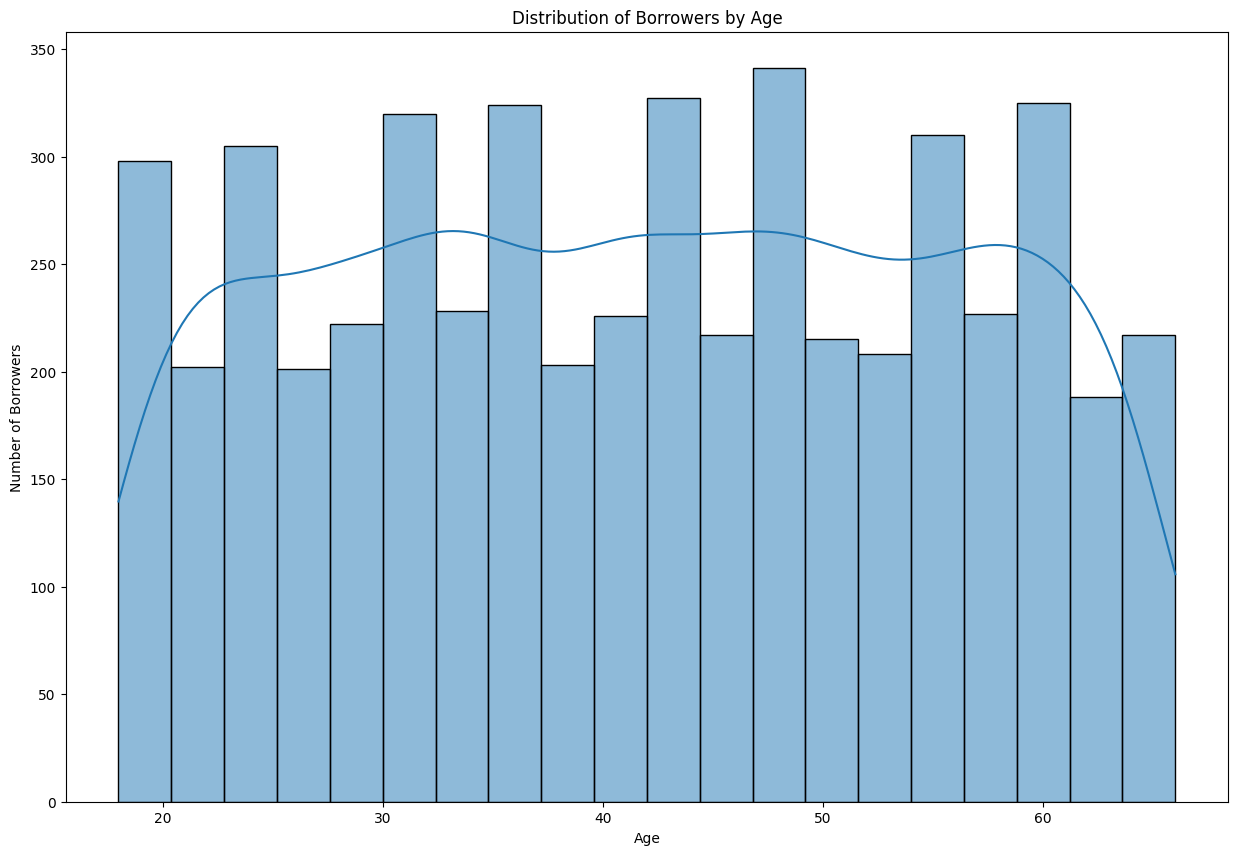

In [25]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot distribution of borrowers by age
borrowers_data['age'] = (pd.to_datetime('today') - pd.to_datetime(borrowers_data['date_of_birth'])).dt.days // 365
sns.histplot(borrowers_data['age'], bins=20, kde=True)
plt.title('Distribution of Borrowers by Age')
plt.xlabel('Age')
plt.ylabel('Number of Borrowers')
plt.show()

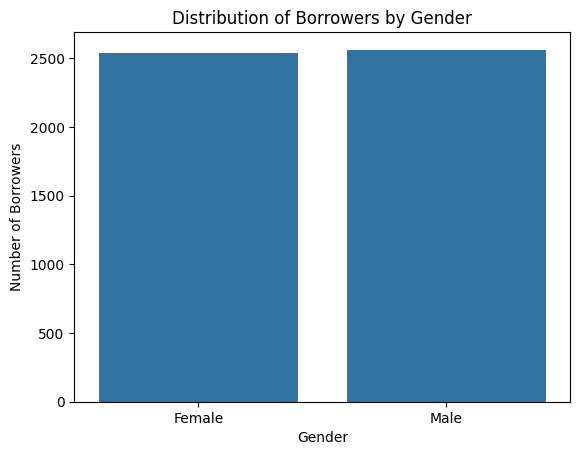

In [26]:
# Plot distribution of borrowers by gender
sns.countplot(x='gender', data=borrowers_data)
plt.title('Distribution of Borrowers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Borrowers')
plt.show()

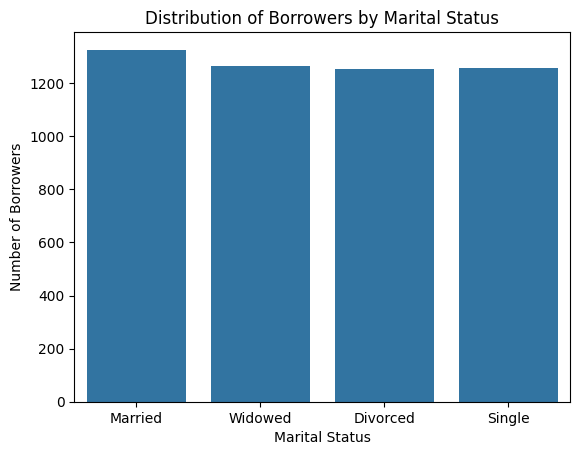

In [27]:
# Plot distribution of borrowers by marital status
sns.countplot(x='marital_status', data=borrowers_data)
plt.title('Distribution of Borrowers by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Borrowers')
plt.show()

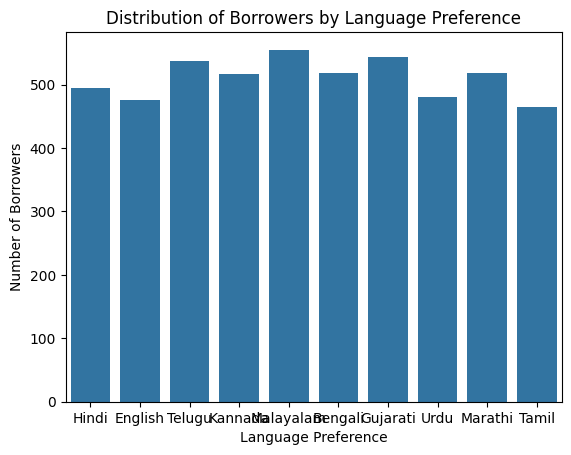

In [28]:
# Plot distribution of borrowers by language preference
sns.countplot(x='language_preference', data=borrowers_data)
plt.title('Distribution of Borrowers by Language Preference')
plt.xlabel('Language Preference')
plt.ylabel('Number of Borrowers')
plt.show()

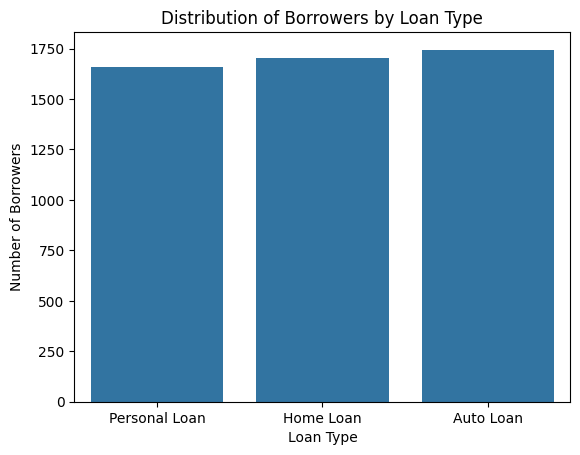

In [29]:
# Plot distribution of borrowers by loan type
sns.countplot(x='loan_type', data=borrowers_data)
plt.title('Distribution of Borrowers by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Number of Borrowers')
plt.show()

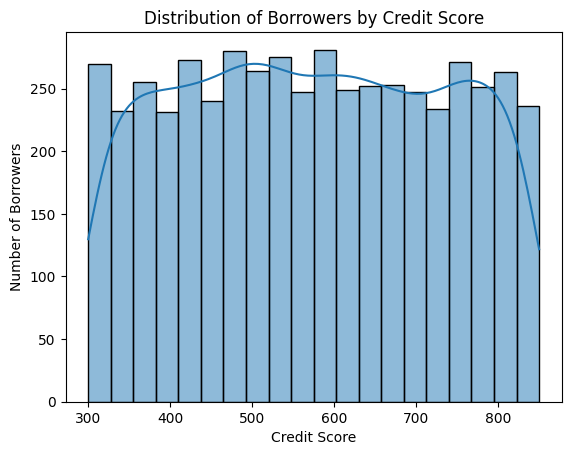

In [30]:
# Plot distribution of borrowers by credit score
sns.histplot(borrowers_data['credit_score'], bins=20, kde=True)
plt.title('Distribution of Borrowers by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Number of Borrowers')
plt.show()

In [31]:
import pandas as pd

# Define weights
weights = {
    'payment_history': 0.30,
    'outstanding_debt_amount': 0.20,
    'income_level': 0.20,
    'employment_status': 0.15,
    'credit_score': 0.15
}

# Example mappings for categorical values
payment_history_mapping = {'on-time': 1, 'late': 0.5, 'default': 0}
employment_status_mapping = {'stable': 1, 'semi-stable': 0.5, 'unstable': 0}
income_level_mapping = {'high': 1, 'medium': 0.5, 'low': 0}

# Apply mappings to relevant columns
borrowers_data['payment_history_score'] = borrowers_data['repayment_history'].apply(lambda x: payment_history_mapping.get(x, 0))
borrowers_data['employment_status_score'] = borrowers_data['financial_status'].apply(lambda x: employment_status_mapping.get(x, 0))
borrowers_data['income_level_score'] = borrowers_data['income_level'].apply(lambda x: income_level_mapping.get(x, 0))

# Normalize the credit score and outstanding debt amount
borrowers_data['credit_score_normalized'] = borrowers_data['credit_score'] / 850  # Assuming 850 is the maximum credit score
borrowers_data['outstanding_debt_amount_normalized'] = borrowers_data['loan_amount'] / borrowers_data['loan_amount'].max()

# Calculate the collection risk score
borrowers_data['collection_risk_score'] = (
    weights['payment_history'] * borrowers_data['payment_history_score'] +
    weights['outstanding_debt_amount'] * borrowers_data['outstanding_debt_amount_normalized'] +
    weights['income_level'] * borrowers_data['income_level_score'] +
    weights['employment_status'] * borrowers_data['employment_status_score'] +
    weights['credit_score'] * borrowers_data['credit_score_normalized']
)

# Rank borrowers based on the collection risk score
borrowers_data['collection_risk_rank'] = borrowers_data['collection_risk_score'].rank(ascending=False)

# Display the top 5 borrowers based on collection risk score
print(borrowers_data[['name', 'collection_risk_score', 'collection_risk_rank']].sort_values(by='collection_risk_rank').head())


              name  collection_risk_score  collection_risk_rank
1458   Nakul Manda               0.694312                   1.0
4646     Gokul Dey               0.692785                   2.0
3789     Adah Kala               0.690632                   3.0
1951  Inaaya  Chad               0.688414                   4.0
329    Aarna Krish               0.687682                   5.0


In [32]:
borrowers_data

,name,date_of_birth,gender,marital_status,phone_number,email_address,mailing_address,language_preference,geographical_location,credit_score,...,income_level,financial_status,age,payment_history_score,employment_status_score,income_level_score,credit_score_normalized,outstanding_debt_amount_normalized,collection_risk_score,collection_risk_rank
0,Mannat Raja,1993-07-04,Female,Married,+917337990570,mdeshpande@gmail.com,"47/359, Manda Nagar\nPhusro-351513",Hindi,Rourkela,491.0,...,low,semi-stable,31,0,0.5,0.0,0.577647,0.347702,0.231187,4588.0
1,Kashvi Bera,2000-11-25,Female,Widowed,+913707544917,ganeshvivaan@gmail.com,"06/109\nKothari Marg, Amritsar 359591",English,Dewas,601.0,...,medium,stable,23,0,1.0,0.5,0.707059,0.134306,0.382920,2531.0
2,Rasha Bhagat,1976-01-14,Female,Married,+916316296250,neysasankaran@gmail.com,"72/566\nBava Marg, Ajmer-034063",Telugu,Guwahati,540.0,...,medium,stable,48,0,1.0,0.5,0.635294,0.545856,0.454465,1429.0
3,Ritvik Kalla,2003-12-05,Female,Divorced,+919003762470,shamikbath@gmail.com,"85/222\nSheth Road, Secunderabad 193560",Hindi,Jabalpur,478.0,...,low,semi-stable,20,0,0.5,0.0,0.562353,0.796636,0.318680,3559.0
4,Tejas De,1991-11-14,Female,Single,+913536405926,jivin77@gmail.com,71/49\nShukla Road\nNoida-018208,Kannada,Guntakal,589.0,...,high,unstable,32,0,0.0,1.0,0.692941,0.515722,0.407086,2160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,Purab Chowdhury,1993-06-19,Male,Married,+914080453896,rania23@gmail.com,H.No. 357\nChana Nagar\nDehri-804020,Telugu,Kirari Suleman Nagar,586.0,...,medium,stable,31,0,1.0,0.5,0.689412,0.962015,0.545815,445.0
5100,Pihu Uppal,1993-05-22,Male,Divorced,+916738528748,samaira17@gmail.com,"19, Dhillon Street\nRanchi-830581",Gujarati,Katihar,702.0,...,medium,stable,31,0,1.0,0.5,0.825882,0.644657,0.502814,833.0
5101,Myra Venkatesh,1970-09-12,Male,Widowed,+918882223668,wsankaran@gmail.com,"14\nShah Path, Latur 212670",Hindi,Jamshedpur,482.0,...,low,semi-stable,53,0,0.5,0.0,0.567059,0.397388,0.239536,4531.0
5102,Shayak Rout,1963-03-29,Female,Married,+919462199517,tkrish@gmail.com,"H.No. 448\nGanguly Ganj, Gaya 501189",Telugu,Udaipur,801.0,...,medium,unstable,61,0,0.0,0.5,0.942353,0.935412,0.428435,1827.0


## Data Loading

In [34]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

# MySQL connection parameters
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Datta@2505',
    'database': 'debt_collection'
}

def load_data(data):
    try:
        # Establish connection to MySQL database using db_config parameters
        connection = mysql.connector.connect(**db_config)
        
        if connection.is_connected():
            cursor = connection.cursor()

            # Insert data into the 'borrowers' table row by row
            for _, row in data.iterrows():
                # Debugging: Print the row values
                print(f"Inserting row: {tuple(row)}")

                # Replace None or NaN with empty strings if necessary
                row = row.fillna('')

                # Insert query
                insert_query = """
                INSERT INTO borrowers (
                    name, date_of_birth, gender, marital_status, phone_number, email_address, mailing_address,
                    language_preference, geographical_location, credit_score, loan_type, loan_amount, loan_term,
                    interest_rate, loan_purpose, emi, ip_address, geolocation, repayment_history, 
                    days_left_to_pay_current_emi, delayed_payment, age, payment_history_score, employment_status_score,
                    income_level_score, credit_score_normalized, outstanding_debt_amount_normalized, collection_risk_score,
                    collection_risk_rank
                ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
                """
                
                try:
                    cursor.execute(insert_query, tuple(row))
                except Error as e:
                    print(f"Error during row insertion: {e}")
            
            connection.commit()  # Commit changes to the database
            print("Data loaded successfully.")
            
    except Error as e:
        print(f"Error: {e}")
    
    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()

if __name__ == "__main__":
    # Assuming borrowers_data is already defined
    data = borrowers_data
    load_data(data)


Inserting row: ('Mannat Raja', '1993-07-04', 'Female', 'Married', '+917337990570', 'mdeshpande@gmail.com', '47/359, Manda Nagar\nPhusro-351513', 'Hindi', 'Rourkela', 491.0, 'Personal Loan', 34766.0, 15.0, 0.28, 'Medical Emergency', 2773.61, '10.128.115.114', '-71.6020475, -51.892151', "[{'Payment Date': datetime.date(2023, 7, 2), 'Payment Mode': 'Credit Card'}, {'Payment Date': datetime.date(2023, 8, 20), 'Payment Mode': 'Net Banking'}, {'Payment Date': datetime.date(2023, 9, 5), 'Payment Mode': 'Net Banking'}, {'Payment Date': datetime.date(2023, 10, 25), 'Payment Mode': 'Debit Card'}, {'Payment Date': datetime.date(2023, 11, 24), 'Payment Mode': 'Debit Card'}, {'Payment Date': datetime.date(2023, 12, 11), 'Payment Mode': 'Net Banking'}]", 6.0, 'Yes', 'low', 'semi-stable', 31, 0, 0.5, 0.0, 0.5776470588235294, 0.3477017242069048, 0.23118740366491036, 4588.0)
Error during row insertion: Not all parameters were used in the SQL statement
Inserting row: ('Kashvi Bera', '2000-11-25', 'Femal

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

